## Observations and Insights

* Capomulin shown the maximum reduction in tumor growth
* Mouse weight contributes shows the significant  effectiveness in curing tumor of drug regimen.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouseDataFile = "data/Mouse_metadata.csv"
studyDataFile = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouseDataFile)
studyData = pd.read_csv(studyDataFile)

# Combine the data into a single dataset
combineData = pd.merge(studyData, mouseData, on="Mouse ID", how="left")
combineData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryData = combineData[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


## Bar plots

In [3]:
# 
combineData.groupby("Drug Regimen")
groupByData = combineData.groupby("Drug Regimen")
summaryDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
summaryDF.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


<IPython.core.display.Javascript object>


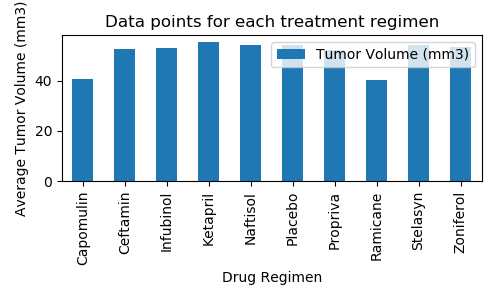

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summaryDF.plot(kind="bar", figsize=(5,3))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


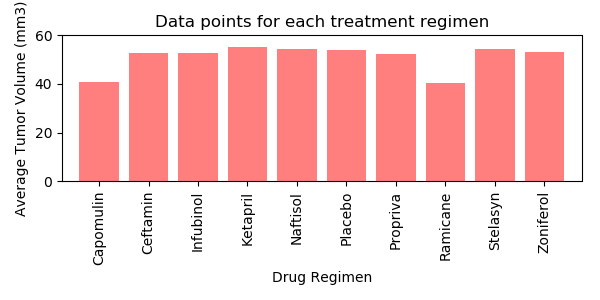

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xAxis = np.arange(len(summaryDF))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(6, 3))
plt.bar(xAxis, summaryDF["Tumor Volume (mm3)"], color='red', alpha=0.5)
plt.xticks(tickLocations, list(summaryDF.index), rotation="vertical") #, summaryDF["Drug Regimen"]
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Pie plots

<IPython.core.display.Javascript object>


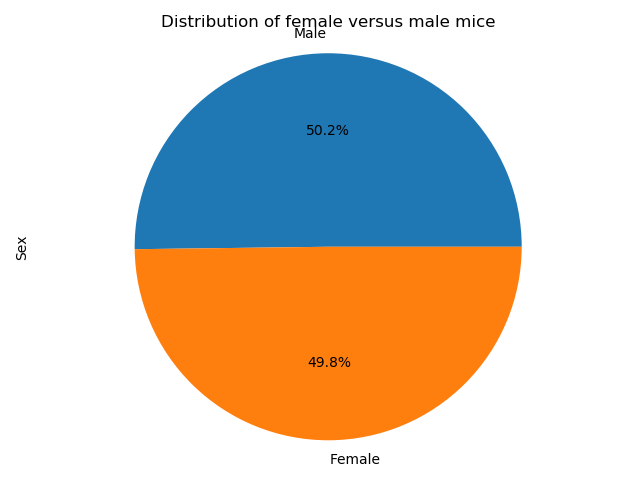

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceCount = mouseData["Sex"].value_counts()
plt.figure()
miceCount.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


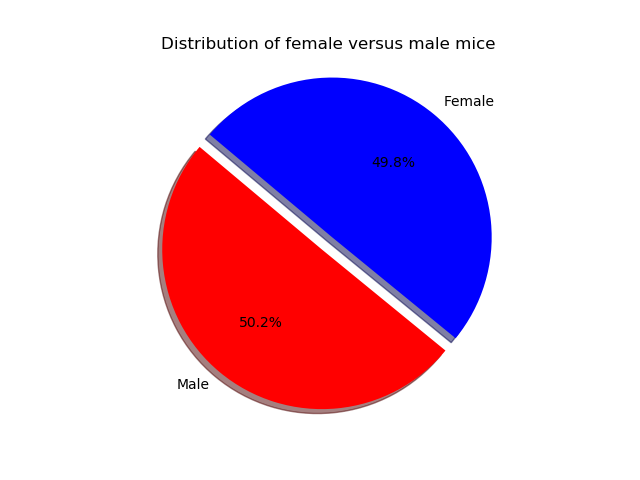

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimenData = combineData[(combineData["Drug Regimen"] == "Capomulin") | 
                          (combineData["Drug Regimen"] == "Ramicane") | 
                          (combineData["Drug Regimen"] == "Infubinol") | 
                          (combineData["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


<IPython.core.display.Javascript object>


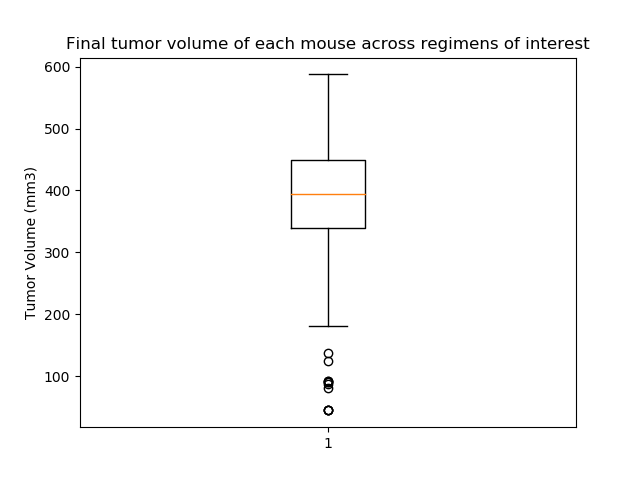

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(regimenPlot)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


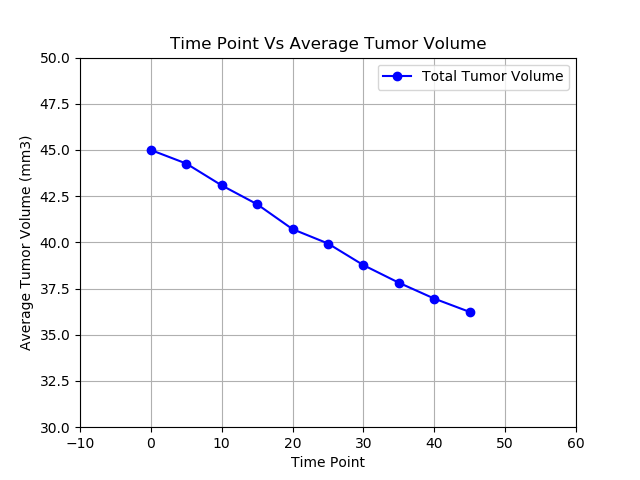

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorData = combineData[(combineData["Drug Regimen"] == "Capomulin")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumorTotal, = plt.plot(xAxis, tumorPlotDF["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
plt.xlim(-10, 60)
plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [11]:
scatterData = combineData[(combineData["Drug Regimen"] == "Capomulin")]
scatterData = scatterData[["Weight (g)", "Tumor Volume (mm3)"]]
groupByData = scatterData.groupby(["Weight (g)"])
scatterDataDF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
scatterDataDF.head()

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700


<IPython.core.display.Javascript object>


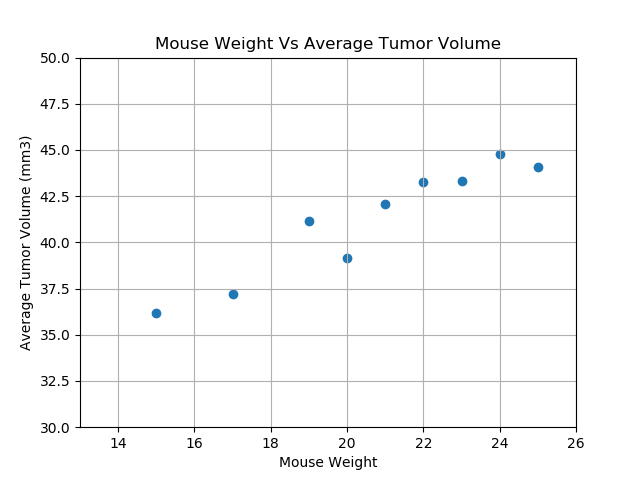

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure()
plt.scatter(scatterDataDF.index, scatterDataDF["Tumor Volume (mm3)"], marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlim(13, 26)
plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [13]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDataDF.index, scatterDataDF["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


<IPython.core.display.Javascript object>


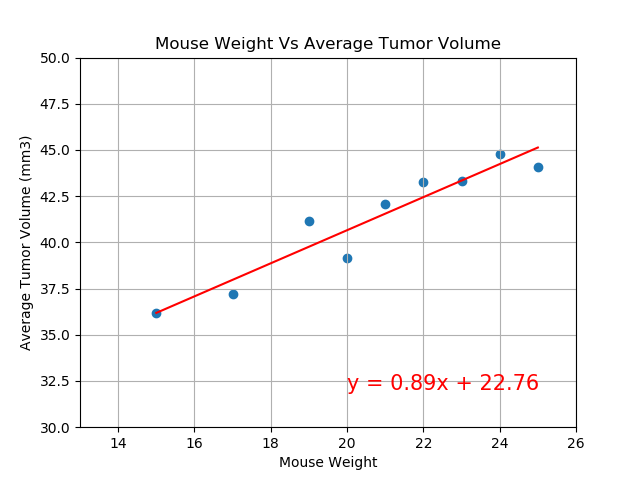

In [14]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatterDataDF.index
y_values = scatterDataDF["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(13, 26)
plt.ylim(30, 50)
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()